In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv(r"C:\Users\sanje_crlv28m\Downloads\spam.csv", encoding ='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.shape

(5572, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# drop last 3 cols 
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# renaming the cols
data.rename(columns={'v1':'target','v2':'text'},inplace=True)
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
data['target'] = encoder.fit_transform(data['target'])
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
# check for duplicate values
data.duplicated().sum()

403

In [12]:
# remove duplicates
data = data.drop_duplicates(keep='first')

In [13]:
data.duplicated().sum()

0

In [14]:
data.shape

(5169, 2)

In [15]:
# Data Explorations
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

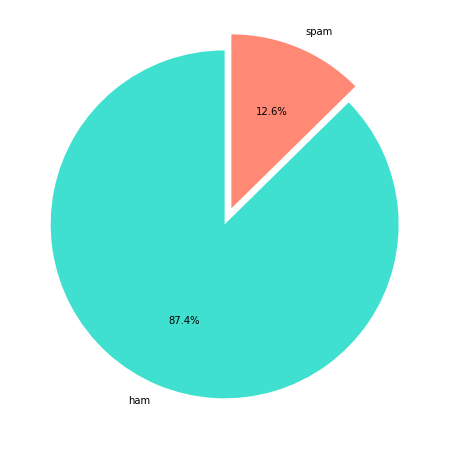

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.pie(data['target'].value_counts(), labels=['ham','spam'], autopct='%1.1f%%', colors = ['turquoise','#ff8975'], startangle=90, explode = (0, 0.1))
plt.show()

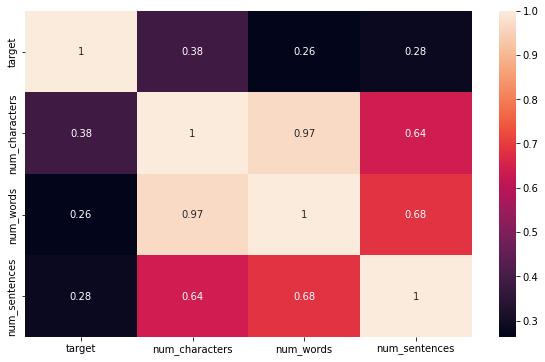

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [26]:
# Extreme correlation between num_words and num_characters. Same goes for num_words and num_sentences
# So we need to consider just one of these three - preferrably num_characters for our model!¶

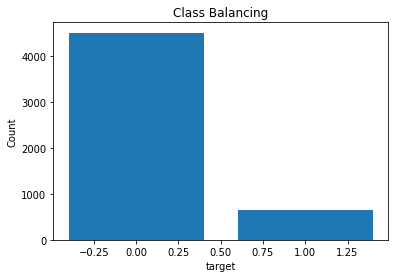

In [63]:
un, count = np.unique(data.target, return_counts=True)
plt.bar(un, count)
plt.xlabel("target")
plt.ylabel("Count")
plt.title("Class Balancing")
plt.show()

In [66]:
vec = TfidfVectorizer()
enc = LabelEncoder()
data.target = enc.fit_transform(data.target.values)
X_train,X_test,Y_train,Y_test = train_test_split(vec.fit_transform(data['text']).toarray(),
                                                 data['target'].values,
                                                 test_size = 0.2,
                                                 random_state=42)

In [67]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,Y_train)

RandomForestClassifier()

In [68]:
from sklearn.metrics import accuracy_score, precision_score,recall_score
print("Train Accuracy     : {:.2f} %".format(accuracy_score(model.predict(X_train),Y_train)))
print("Test Accuracy      : {:.2f} %".format(accuracy_score(model.predict(X_test),Y_test)))
print("Precision Accuracy : {:.2f} %".format(precision_score(model.predict(X_test),Y_test)))
print("Recall Accuracy    : {:.2f} %".format(recall_score(model.predict(X_test),Y_test)))

Train Accuracy     : 1.00 %
Test Accuracy      : 0.98 %
Precision Accuracy : 0.83 %
Recall Accuracy    : 0.99 %


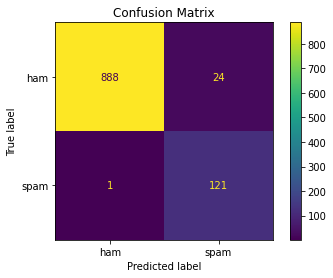

In [70]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cf = confusion_matrix(model.predict(X_test),Y_test, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = ["ham","spam"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()